## Pruebita inicial para comenzar a escribir alguito

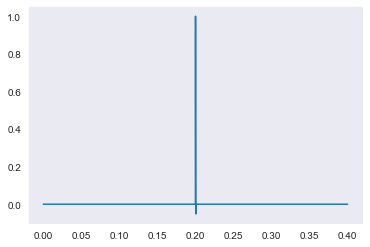

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

fs = 20000
t1 = np.linspace(1/fs, 0.4, 8000)
fc = 2000
orden = 2
b, a = signal.butter(orden, fc/(fs/2))
x = np.zeros_like(t1)
x[3999] = 1
Vm = signal.lfilter(b, a, x)
Vm = Vm / np.max(Vm)
plt.plot(t1, Vm)

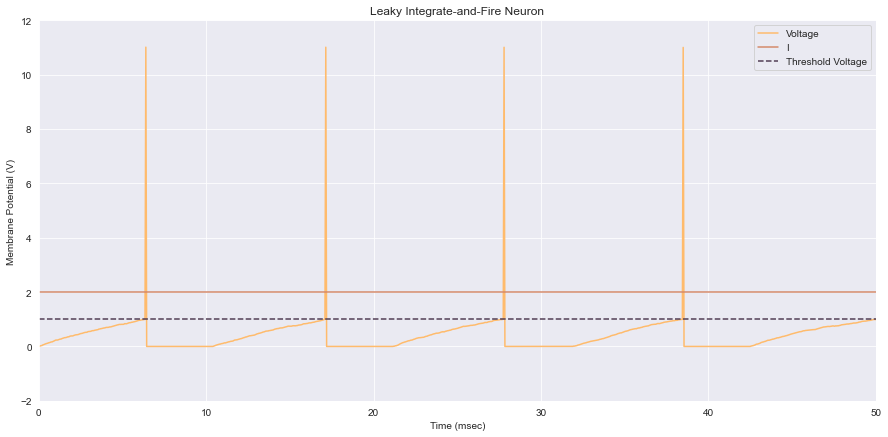

In [6]:
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np

# setup parameters and state variables
T = 400                        # total time to simulate (msec) 50
dt = 0.05                    # simulation time step (msec) 0.125
time = np.arange(0, T+dt, dt) # time array
t_rest = 0                    # initial refractory time

# LIF properties
Vm = np.zeros(len(time)) # potential (V) trace over time
Rm = 1                   # resistance (kOhm)
Cm = 10                  # capacitance (uF)
tau_m = Rm*Cm            # time constant (msec)
tau_ref = 4              # refractory period (msec)
Vth = 1                  # spike threshold (V) 
V_spike = 10.0           # spike delta (V)

I = 2.0 * np.ones(len(time))        # input current (A)
noise = []                          # noise term

# iterate over each time step
for i, t in enumerate(time):
    if t > t_rest:
        randomTerm = np.random.normal(0,1)
        noise.append(randomTerm)
        Vm[i] = Vm[i-1] + (-Vm[i-1] + I[i]*Rm + randomTerm) / tau_m * dt
        if Vm[i] >= Vth:
            Vm[i] += V_spike
            t_rest = t + tau_ref


#sns.set_style('dark')
plt.figure(figsize=(15,7))
#plt.style.use(styles[16])
plt.plot(time, Vm, color = u'#FFBB6C', label='Voltage')
plt.plot(I, color= u'#D4896A', linestyle='-', label='I')
plt.plot([0,50], [Vth, Vth], color='#503C53', linestyle='--', label='Threshold Voltage')
plt.legend(loc=1)
plt.grid()
plt.title('Leaky Integrate-and-Fire Neuron')
plt.ylabel('Membrane Potential (V)')
plt.xlabel('Time (msec)')
plt.xlim(0,50)
plt.ylim(-2,12)
plt.savefig('LIF.png', dpi=300)